<a href="https://colab.research.google.com/github/AryKau33/Projects/blob/main/DIABETES_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETES PREDICTION MODEL
### PREPARING A ML-MODEL TO PREDICT IF A PERSON HAS DIABETES OR NOT

In [ ]:
# IMPORTING THE NECESSARY PYTHON LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
%matplotlib inline

### OVERVIEWING THE DATA SET

In [ ]:
data = pd.read_csv('kaggle_diabetes.csv')

In [ ]:
data.shape

(2000, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
#CHECKING FOR NULL VALUES
data.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


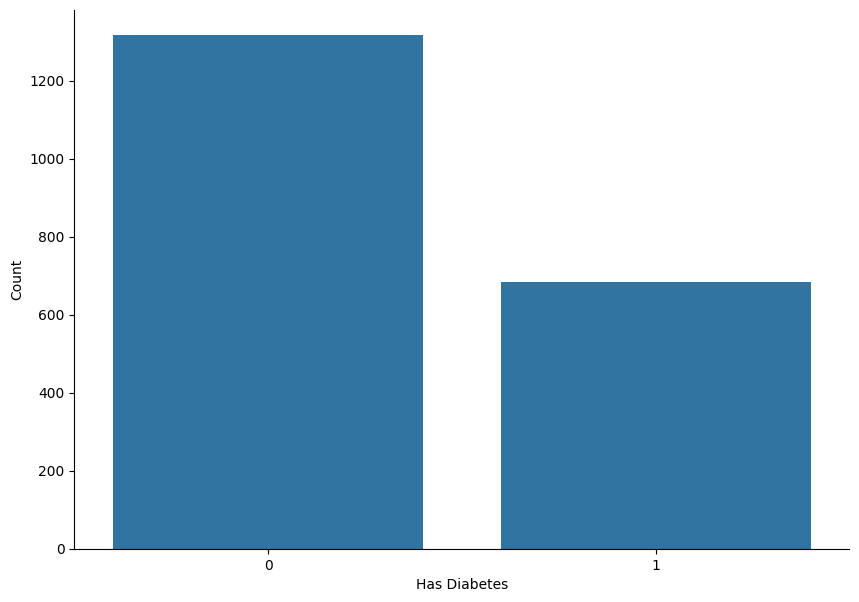

In [ ]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=data)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

## REFINING THE DATA


In [ ]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
data_copy = data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

,0
Pregnancies,0
Glucose,13
BloodPressure,90
SkinThickness,573
Insulin,956
BMI,28
DiabetesPedigreeFunction,0
Age,0
Outcome,0


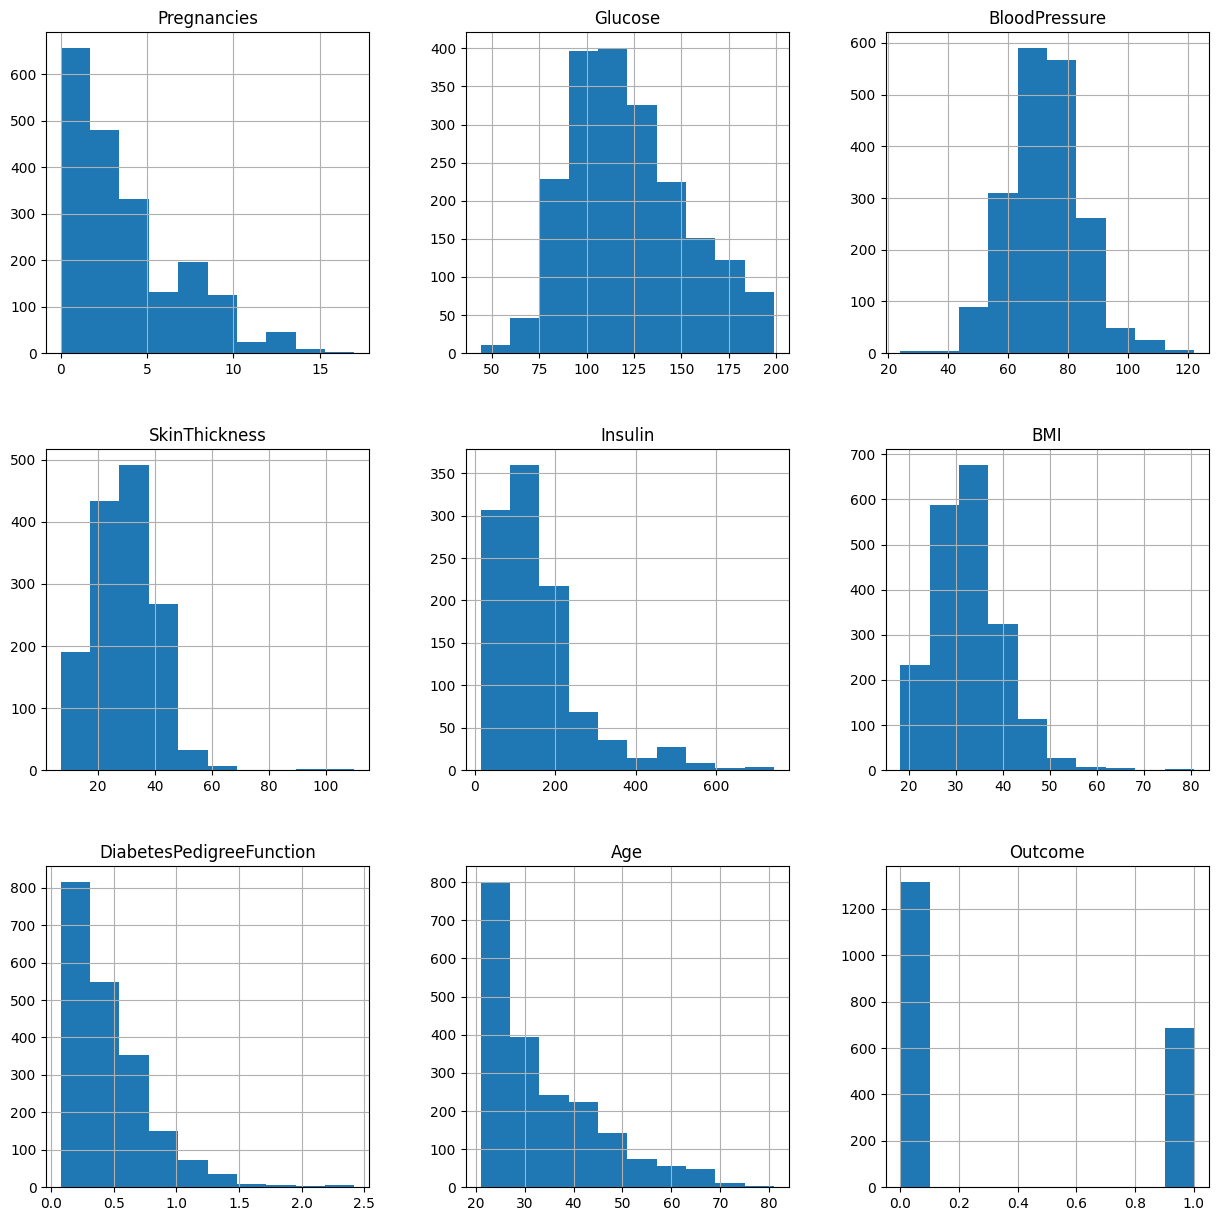

In [ ]:
# Plotting histogram of dataset before replacing NaN values
p = data_copy.hist(figsize = (15,15))

In [ ]:
# Replacing NaN value by mean, median depending upon distribution
data_copy['Glucose'] = data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'] = data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean())
data_copy['SkinThickness'] = data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'] = data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'] = data_copy['BMI'].fillna(data_copy['BMI'].median())

In [ ]:
# Ensuring there are no null values now
data_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


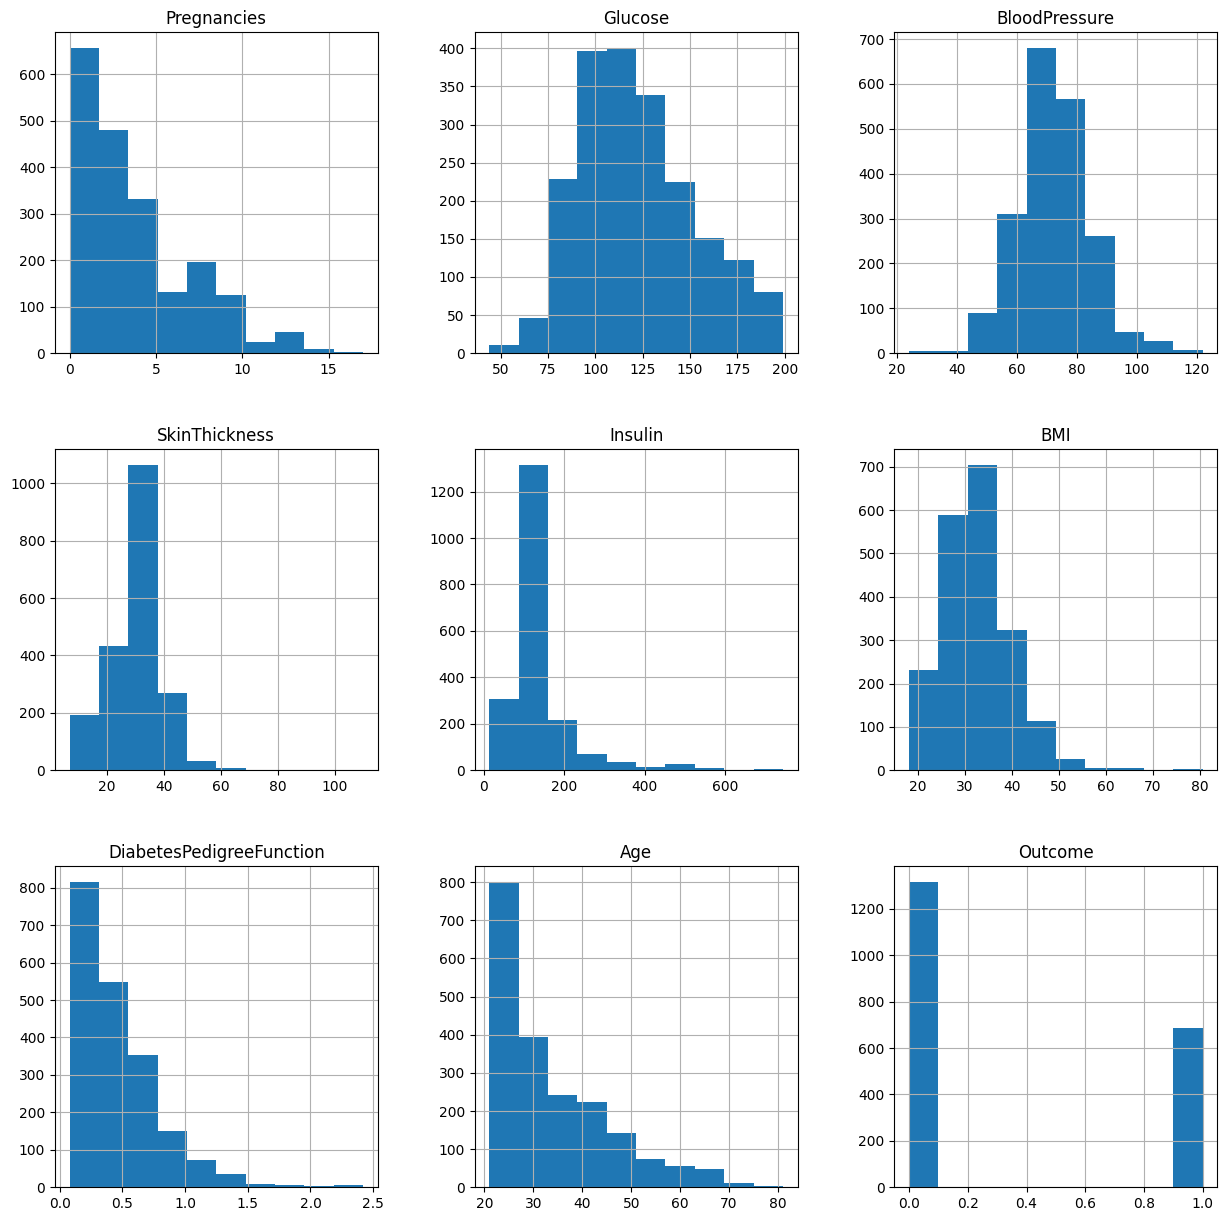

In [ ]:
# Plotting histogram of dataset after replacing NaN values
p = data_copy.hist(figsize = (15,15))

## MODEL BUILDING

In [ ]:
X = data.drop(columns='Outcome')
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd  # Make sure to import pandas

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0),
            'parameters': {
                'C': [1, 5, 10]
            }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best', random_state=0),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10]
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini', random_state=0),
            'parameters': {
                'n_estimators': [10, 15, 20, 50, 100, 200]
            }
        },

        'svm': {
            'model': SVC(gamma='auto', random_state=0),
            'parameters': {
                'C': [1, 10, 20],
                'kernel': ['rbf', 'linear']
            }
        }
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(
            estimator=model_params['model'],
            param_grid=model_params['parameters'],
            cv=cv_shuffle
        )
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

# Call the function properly outside the function body
redata = find_best_model(X_train, y_train)
print(redata)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


                 model                         best_parameters     score
0  logistic_regression                                {'C': 5}  0.763125
1        decision_tree  {'criterion': 'gini', 'max_depth': 10}  0.898125
2        random_forest                   {'n_estimators': 100}  0.950625
3                  svm              {'C': 20, 'kernel': 'rbf'}  0.869375


Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.

In [ ]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

Average Accuracy : 95%


RandomForestClassifier(n_estimators=20, random_state=0)

## MODEL EVALUATION

In [ ]:
# Creating a confusion matrix to evaluate the prepared model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  5, 123]])

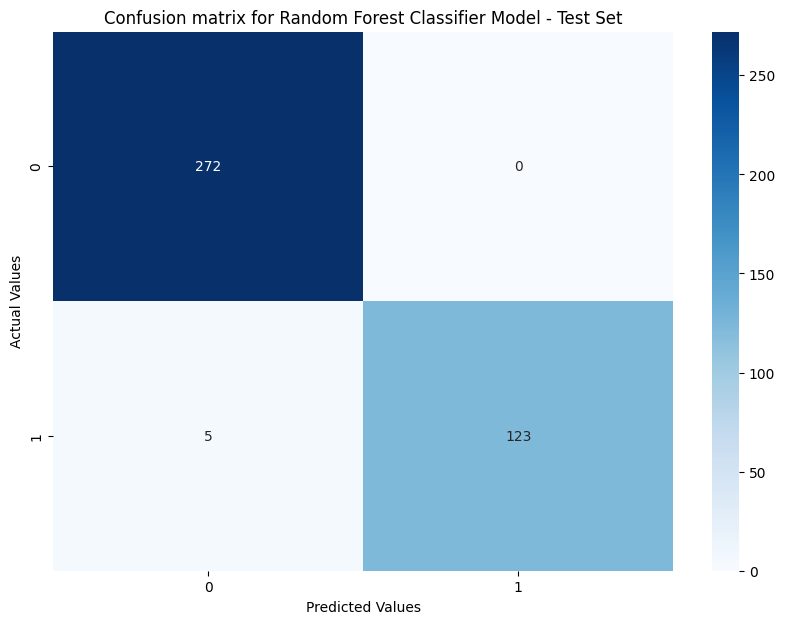

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 98.75%
